<a href="https://colab.research.google.com/github/Bendrox/Advanced-RAG/blob/main/RAG_Retrieval_Augmented_Generation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input API Keys + Endpoint

In [3]:
# OpenAI Azure portal API KEY
import getpass
import os
os.environ['OPENAI_API_KEY'] = getpass.getpass("Enter your API OpenAI Plateform key : ")

Enter your API OpenAI Plateform key : ··········


In [6]:
# OpenAI Azure portal endpoint
os.environ['AZ_OPENAI_Endpoint'] = getpass.getpass("Enter your API OpenAI key : ") #

Enter your API OpenAI key : ··········


# 0 - OpenAI Azure model deployement

In [7]:
!pip install openai
!pip install langchain
!pip install python-dotenv
!pip install langchain-community langchain-core
!pip install -qU langchain-openai
!pip install --upgrade langchain

In [29]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_endpoint= os.environ['AZ_OPENAI_Endpoint'], # os.getenv to get the variable value # Lecture uniquement
    openai_api_version="2024-08-01-preview",
    model_name="gpt-4o",
    openai_api_key= os.environ['OPENAI_API_KEY'] , #os.getenv('OPENAI_API_KEY')
    openai_api_type="azure",
    temperature=0,
    deployment_name="gpt-4o")
    #streaming=True

In [31]:
prompt = "Tell me something funny"

for chunk in llm.stream(prompt):
    print(chunk.content, end="", flush=True)

Sure, here's a joke for you:

Why don't scientists trust atoms?

Because they make up everything!

# 2 - LangChain Chat with your data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


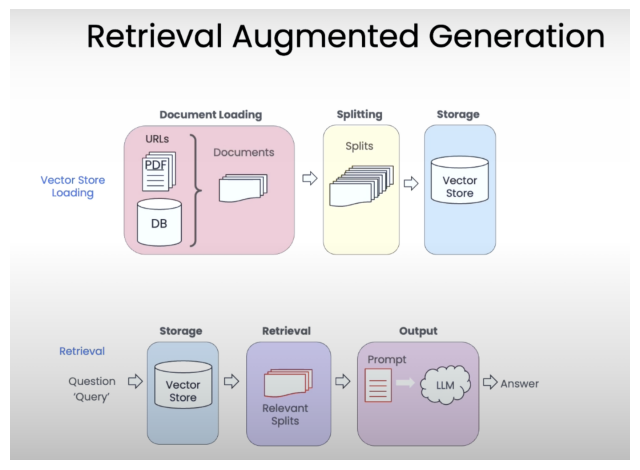

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/RAG_1.png")
plt.figure(figsize=(8, 7))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

## 1 - Document loader


• Loaders deal with the specifics of accessing and converting data:
- Accessing,
Web Sites,
Data Bases,
YouTube arXiv.


- Data Types,
PDF,
HTML,
JSON,
Word, PowerPoint...

Returns a list of 'Document' objects:

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


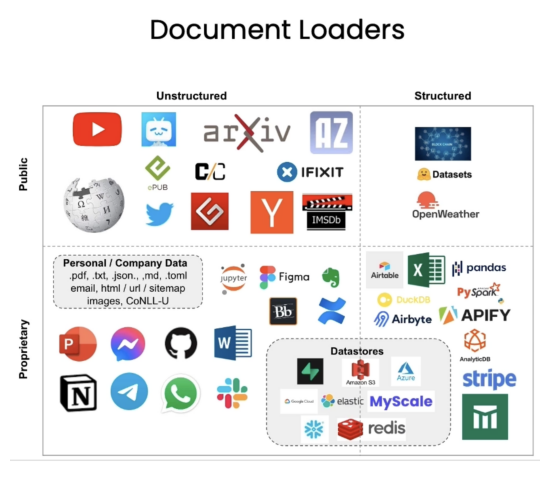

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/Ducoment_loaders.png")
plt.figure(figsize=(7, 6))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

In [ ]:
pip install pypdf

In [ ]:
pip install -U langchain-community

In [38]:
from langchain.document_loaders import PyPDFLoader

In [98]:
LEC_Groupama_2022 = PyPDFLoader("/content/drive/MyDrive/Data/Lec29/LEC29_Groupama_2022.pdf")
pages_LEC_Groupama_2022 = LEC_Groupama_2022.load()
len(pages_LEC_Groupama_2022)

84

In [99]:
LEC_Groupama_2023 = PyPDFLoader("/content/drive/MyDrive/Data/Lec29/LEC29_Groupama_2023.pdf")
pages_LEC_Groupama_2023 = LEC_Groupama_2023.load()
len(pages_LEC_Groupama_2023)

65

In [122]:
pages_LEC_Groupama_2023[1].page_content

'2 / Rapport ESG-Climat Groupama\nINTRODUCTION\nÉdito de François Coste\nPrésentation du Groupe\nChiffres clés pour l’année 2023\nI. PANORAMA DE NOTRE APPROCHE ESG\nA. Une approche fondée sur la Charte d’investissement durable du Groupe\nB. Intégration ESG dans la gestion d’actifs du Groupe\nC. Limiter l’exposition aux risques de durabilité\nD. Investissements ayant des incidences positives d’un point de vue environnemental et social\nE. Intégration ESG dans la gestion immobilière\nF. T ableau de synthèse des objectifs, dispositifs et mesures ESG\nG. Des engagements de place en faveur de la finance durable\nH. Part des encours sous gestion prenant en compte des critères ESG\nI. Communiquer autour de la politique d’investissement durable du Groupe\nII. MOYENS INTERNES DÉPLOYÉS PAR GROUPAMA\nA. Ressources financières, humaines et techniques\nB. Renforcement de l’expertise interne\nIII. UNE GOUVERNANCE DÉDIÉE À LA DURABILITÉ\nA. La gouvernance du Groupe a été sensiblement renforcée au cou

In [47]:
type(pages_LEC_Groupama_2022[1])

langchain_core.documents.base.Document

In [128]:
len(pages_LEC_Groupama_2022)

84

In [130]:
def load_and_combine(path: str) -> str: # chemin str retourne str

    #charger les rapports SFCR a partir du chemin
    loader = PyPDFLoader(path)
    pages = loader.load()

    #var crea
    text = ""

    #combine
    for i in range(len(pages)):
        text += pages[i].page_content

    return text

In [134]:
doc_combined = load_and_combine('/content/drive/MyDrive/Data/Lec29/LEC29_Groupama_2023.pdf')

In [135]:
doc_combined

'1 / Rapport ESG-Climat Groupama\nESG CLIMAT\nGROUPAMA\nRAPPORT ESG-CLIMAT\nJUIN 2024\nRapport annuel 20232 / Rapport ESG-Climat Groupama\nINTRODUCTION\nÉdito de François Coste\nPrésentation du Groupe\nChiffres clés pour l’année 2023\nI. PANORAMA DE NOTRE APPROCHE ESG\nA. Une approche fondée sur la Charte d’investissement durable du Groupe\nB. Intégration ESG dans la gestion d’actifs du Groupe\nC. Limiter l’exposition aux risques de durabilité\nD. Investissements ayant des incidences positives d’un point de vue environnemental et social\nE. Intégration ESG dans la gestion immobilière\nF. T ableau de synthèse des objectifs, dispositifs et mesures ESG\nG. Des engagements de place en faveur de la finance durable\nH. Part des encours sous gestion prenant en compte des critères ESG\nI. Communiquer autour de la politique d’investissement durable du Groupe\nII. MOYENS INTERNES DÉPLOYÉS PAR GROUPAMA\nA. Ressources financières, humaines et techniques\nB. Renforcement de l’expertise interne\nIII

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


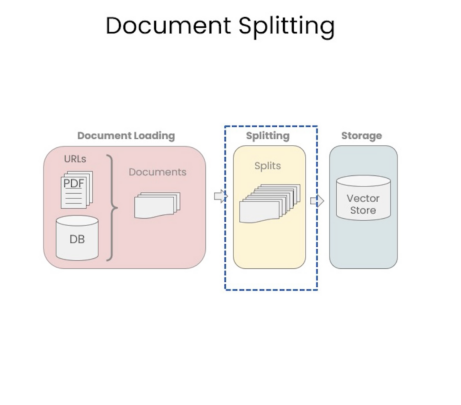

In [57]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/Document_splitting.png")
plt.figure(figsize=(6, 5))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

## 2 - Parsing / Parsing

### 2.2 - Option 1: Recursive splitting

In [52]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

LangChain Splitters:
- CharacterTextSplitter :  divise le texte en morceaux de taille définie. Ne prend pas en considération la structure du text. Pourrait couper en plein milieu de phrases ou de blocs logiques.

- RecursiveCharacterTextSplitter: divise le texte de manière hiérarchique en utilisant plusieurs séparateurs. divise par paragraphe (\n\n), puis par phrase (.), et finalement par mot ( ) pour s'assurer que les morceaux soient cohérents et ne dépassent pas 50 caractères.





In [ ]:
# Option 1: CharacterTextSplitter
# chunk_size =26
# chunk_overlap = 4
# implementation Option 1:
# c_splitter = CharacterTextSplitter(
#     chunk_size=chunk_size,
#     chunk_overlap=chunk_overlap)

In [93]:
# Option 2: RecursiveCharacterTextSplitter
splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "."],  # Diviser par paragraphe, puis phrase, puis mot
    chunk_size=50,                  # Taille maximale de chaque morceau
    chunk_overlap=15)                 # Chevauchement optionnel pour la cohérence des morceaux

In [97]:
# Cleaning removing \t + \n (One Page)
# pages_LEC_Groupama_2022[3].page_content = pages_LEC_Groupama_2022[3].page_content.replace("\t", " ")
# pages_LEC_Groupama_2022[3].page_content

'Après les turbulences sanitaires et économiques des années 2020 et 2021  dues à la pandémie de Covid, l’année 2022 a vu la montée des risques  économiques,  géopolitiques  et  climatiques.  Les  phénomènes  que  nous  qualifiions d’exceptionnels dans le passé tendent aujourd’hui à devenir la  norme, et chaque nouvelle année apporte son lot de premières. La « facture  climatique » en France à elle seule a atteint plus de 10 milliards d’euros pour  les assureurs, un niveau record pour le XXIe siècle, avec notamment des  épisodes de grêle intenses qui ont touché une commune sur deux pour un  coût historique de 5 milliards d’euros.   L’assurance ne peut pas faire disparaître les dangers. Elle permet une  mise en commun des risques afin de pouvoir indemniser les victimes d’un  sinistre. Cependant, pour que cela fonctionne, deux préalables sont requis :  tout le monde ne peut pas être touché en même temps et les primes  d’assurance doivent être abordables pour ceux qui doivent les payer, si

In [112]:
# Fonction pour nettoyer les sauts de ligne multiples
def clean_consecutive_newlines(doc):
    doc.page_content = re.sub(r"\n\n+", "\n", doc.page_content)
    return doc

# Appliquer le nettoyage à chaque document
docs = [clean_consecutive_newlines(doc) for doc in pages_LEC_Groupama_2022]

len(docs)

84

In [110]:
#chunks = splitter.split_text(pages_LEC_Groupama_2022.page_content)
def splitter_split_text_fonct(x):
  return splitter.split_text(x)

# Appliquer le nettoyage à chaque document
docs = [splitter_split_text_fonct(doc) for doc in docs]

# Vérifier le résultat
for doc in docs:
    print(f"Source: {doc.metadata['source']}, Contenu:\n{doc.page_content}")

### 2.3 - Option 2: Token splitting
Not relevant to keep the meaning

### 2.4 - Option 3: Context aware splitting (MarkDown)

Aims to keep text with common context together.

For this, use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks.



In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [ ]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n
## Chapter 2\n\n \
Hi this is Molly"""

In [ ]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [ ]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on)


In [ ]:
md_header_splits = markdown_splitter.split_text(markdown_document)

In [ ]:
md_header_splits[1]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'}, page_content='Hi this is Lance')

Output is a combination between headers_to_split_on and headers_to_split_on.

## 3 - Embedding - OpenAI Platform ( https://platform.openai.com/api-keys )

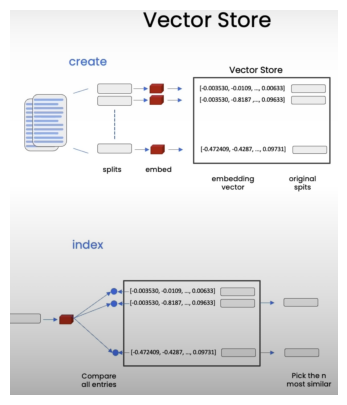

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/vectorstore.png")
plt.figure(figsize=(6, 5))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

Indexation des vecteurs d embeddings, on crée une structure de données optimisée qui permet de retrouver rapidement les vecteurs les plus proches pour une requête donnée. Les techniques d'indexation incluent souvent :

- Structures de données spécialisées : Par exemple, des arbres k-d (k-dimensional) ou approximate nearest neighbor (ANN).

- Approximation : Des algorithmes comme FAISS (Facebook AI Similarity Search) ou ScaNN (Scalable Nearest Neighbors) sont conçus pour retrouver les vecteurs voisins de manière approximative, mais très rapide, ce qui est suffisant pour de nombreux cas d’usage de RAG.


L index ne contient pas les documents eux-mêmes mais une structure de données optimisée qui facilite la recherche des voisins les plus proches de la requête dans l'espace des embeddings.



In [ ]:
pip install docarray tiktoken

In [ ]:
import os
from langchain.indexes import VectorstoreIndexCreator
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch # do not require to connect to external database.
from getpass import getpass

In [ ]:
# Créer une instance des embeddings OpenAI
embeddings = OpenAIEmbeddings(
    model='text-embedding-ada-002',
    openai_api_key=API_key_OPENAI
)


<ipython-input-31-7fce93398368>:2: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(


In [ ]:
sentence1 = "i like dogs"
sentence2 = "i like canines"


In [ ]:
emb1 = embeddings.embed_query(sentence1)
emb2 = embeddings.embed_query(sentence2)

In [ ]:
print(emb1)

[-0.027612716827229024, -0.005406332473111408, -0.025819026866054372, -0.03304431095860534, -0.027334819494202946, 0.02262322709402784, -0.010471610906397482, -0.008178972344431728, 0.0024947444009393222, -0.019616901167689244, 0.0006765810296154485, 0.02922956353901756, -0.005377911303125964, 0.000705396905735325, 0.00015088861439109007, 0.014160043049741666, 0.02983588059027699, -0.00115737198406951, 0.004247381198842901, -0.003849485517538582, -0.011671614412614524, 0.006877915685897266, 0.013010565654022064, -0.04721698739861645, -0.0023131649107706576, 0.004651593342451305, 0.016989524795371604, -0.0001927308552369904, -0.025844289921303092, -0.016320049174667832, 0.026804291608689676, 0.0029952722919294223, -0.015511626750096107, -0.02473270803977911, 0.0059715972924223055, -0.014993730392207194, 0.009764240702820634, -0.011494772094550947, -0.004411592454943388, -0.010875822584344616, -0.017027420309567224, 0.011191613568921233, 0.006953705317304695, -0.022042173098017127, -0.00

Pour mesurer la similarité entre deux vecteurs d’embedding, on utilise souvent le produit scalaire ou la similarité cosinus. Ces métriques permettent d’obtenir un score indiquant la similarité entre les phrases. Plus ce score est élevé, plus les phrases sont considérées comme similaires.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
np.dot(emb1, emb2)

0.9630396460189722

In [ ]:
similarity_score = cosine_similarity([emb1], [emb2])

In [ ]:
print(similarity_score)

[[0.96303965]]


## 4 - Vectorstore with Chroma

Used to store these embedding

In [ ]:
pip install tiktoken

In [ ]:
from langchain.vectorstores import Chroma # here use Chroma integrated vector Store


In [ ]:
vectordb = Chroma.from_texts( # in course used from documents.
    texts=chunks,
    embedding=embeddings,
)

In [ ]:
print(Chroma.__dict__)

{'__module__': 'langchain_community.vectorstores.chroma', '__annotations__': {'_LANGCHAIN_DEFAULT_COLLECTION_NAME': 'str'}, '__doc__': '.. deprecated:: 0.2.9 Use ``:class:`~langchain_chroma.Chroma``` instead.\n\n`ChromaDB` vector store.\n\nTo use, you should have the ``chromadb`` python package installed.\n\nExample:\n    .. code-block:: python\n\n            from langchain_community.vectorstores import Chroma\n            from langchain_community.embeddings.openai import OpenAIEmbeddings\n\n            embeddings = OpenAIEmbeddings()\n            vectorstore = Chroma("langchain_store", embeddings)', '_LANGCHAIN_DEFAULT_COLLECTION_NAME': 'langchain', '__init__': <function Chroma.__init__ at 0x7cbe1b605990>, 'embeddings': <property object at 0x7cbe1b7fcd10>, '_Chroma__query_collection': <function Chroma.__query_collection at 0x7cbe1b604af0>, 'encode_image': <function Chroma.encode_image at 0x7cbe1b6049d0>, 'add_images': <function Chroma.add_images at 0x7cbe1b604b80>, 'add_texts': <funct

In [ ]:
print(vectordb._collection.count()) #same as splits that we have

51


In [ ]:
question = "Groupama est tourné vers le passé ou l'avenir ?"

In [ ]:
docs = vectordb.similarity_search(question,k=3)

In [ ]:
len(docs)

3

In [ ]:
docs

[Document(metadata={}, page_content='.\nGroupama, c’est aussi des filiales en France \net à l’international qui nous aident à être \nmeilleurs, à capter de la croissance, à diver-\nsifier les risques, à gagner en efficacité, à \nproposer des services innovants qui intè-\ngrent nos offres d’assurance'),
 Document(metadata={}, page_content='. Avant d’évo-\nquer les travaux conduits collectivement \npour remodeler notre stratégie, je voudrais \nrevenir sur quelques réalisations impor -\ntantes menées à bien par nos équipes \nen 2023'),
 Document(metadata={}, page_content='.indd   5240429_GROUPAMA_RA_Fanzine_FR_VG')]

## 5 - Retreival

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


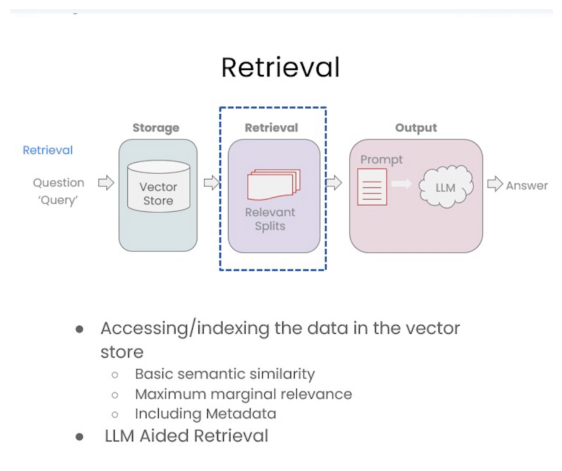

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/Retreival.png")
plt.figure(figsize=(7, 6))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

1 - MMR algo: Algo query based on similarity and diversity

2 - LLM aided Retreival / self query : useful for including metadata to your content. Here use the LLM to convert question to a query.

3 -  Compression: Increase the number of results you can put in the context by shrinking the responses to only the relevant information.

### 5.1 - Similarity Search

In [ ]:
pip install -U langchain-community

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
persist_directory = 'docs/chroma/'

In [ ]:
vectordb = Chroma(
    persist_directory=persist_directory,
    embedding_function=embeddings
)

In [ ]:
print(vectordb._collection.count())

0


In [ ]:
texts = [
    """The Amanita phalloides has a large and imposing epigeous (aboveground) fruiting body (basidiocarp).""",
    """A mushroom with a large fruiting body is the Amanita phalloides. Some varieties are all-white.""",
    """A. phalloides, a.k.a Death Cap, is one of the most poisonous of all known mushrooms.""",
]

In [ ]:
smalldb = Chroma.from_texts(texts, embedding=embeddings)

In [ ]:
question = "Tell me about all-white mushrooms with large fruiting bodies"

In [ ]:
smalldb.similarity_search(question, k=2)

[Document(metadata={}, page_content='A mushroom with a large fruiting body is the Amanita phalloides. Some varieties are all-white.'),
 Document(metadata={}, page_content='The Amanita phalloides has a large and imposing epigeous (aboveground) fruiting body (basidiocarp).')]

### 5.2 - Addressing Diversity: Maximum marginal relevance

In [ ]:
smalldb.max_marginal_relevance_search(question,k=2,
                                      fetch_k=3) # here diversity factor

[Document(metadata={}, page_content='A mushroom with a large fruiting body is the Amanita phalloides. Some varieties are all-white.'),
 Document(metadata={}, page_content='A. phalloides, a.k.a Death Cap, is one of the most poisonous of all known mushrooms.')]


`Maximum marginal relevance` strives to achieve both relevance to the query *and diversity* among the results.

In [ ]:
question = "what did they say about matlab?"
docs_ss = vectordb.similarity_search(question,k=3)
docs_ss

[]

In [ ]:
docs_mmr = vectordb.max_marginal_relevance_search(question,k=3)
docs_mmr

[]

### 5.3 - Addressing Specificity: working with metadata

Vectorstores support operations on `metadata`. It provides context for each embedded chunk.

Example : a question about the third lecture can include results from other lectures as well.

#### Option 1 : manually specifing this

In [ ]:
docs = vectordb.similarity_search(question,
    k=3,
    filter={"source":"docs/cs229_lectures/MachineLearning-Lecture03.pdf"} )

#### Option 2: using metadata using self-query retreival

We often want to infer the metadata from the query itself. To address this, we can use `SelfQueryRetriever`, which uses an LLM to extract:

1. The `query` string to use for vector search
2. A metadata filter to pass in as well

Most vector databases support metadata filters, so this doesn't require any new databases or indexes.

In [ ]:
pip install lark

In [ ]:
from langchain.llms import OpenAI
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.chains.query_constructor.base import AttributeInfo

In [ ]:
# trame
metadata_field_info = [
    AttributeInfo(
        name="source",
        description="The lecture the chunk is from, should be one of `docs/cs229_lectures/MachineLearning-Lecture01.pdf`, `docs/cs229_lectures/MachineLearning-Lecture02.pdf`, or `docs/cs229_lectures/MachineLearning-Lecture03.pdf`",
        type="string",
    ),
    AttributeInfo(
        name="page",
        description="The page from the lecture",
        type="integer",
    ),
]

In [ ]:
from langchain.chat_models import ChatOpenAI

client = ChatOpenAI(model_name="gpt-4o",
    api_key=API_key_OPENAI
)
#client.models.list()


<ipython-input-68-0694ded43469>:3: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  client = ChatOpenAI(model_name="gpt-4o",


In [ ]:
document_content_description = "Lecture notes"

retriever = SelfQueryRetriever.from_llm(
    client,
    vectordb,
    document_content_description,
    metadata_field_info,
    verbose=True)

In [ ]:
docs = retriever.get_relevant_documents(question)

<ipython-input-70-6ed304eeafec>:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(question)


In [ ]:
for d in docs:
    print(d.metadata)

#### Option 3:  Compression

Another approach for improving the quality of retrieved docs is compression.

Information most relevant to a query may be buried in a document with a lot of irrelevant text.

Passing that full document through your application can lead to more expensive LLM calls and poorer responses.

Contextual compression is meant to fix this.

In [ ]:
pip install langchain-community langchain-core

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.chat_models import ChatOpenAI

In [ ]:
llm = ChatOpenAI(
    model_name="gpt-4o",
    openai_api_key= API_key_OPENAI )


In [ ]:
compressor = LLMChainExtractor.from_llm(llm)

In [ ]:
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vectordb.as_retriever()
)

In [ ]:
question = "what did they say about matlab?"
compressed_docs = compression_retriever.get_relevant_documents(question)
print(compressed_docs)
#pretty_print_docs(compressed_docs)

[]


## 6 - Question Answering

### 6.1 - Introduction describing the goal

This come out after retreiving

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


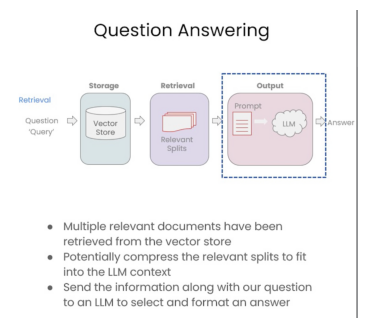

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/Question_Answering.png")
plt.figure(figsize=(5, 4))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


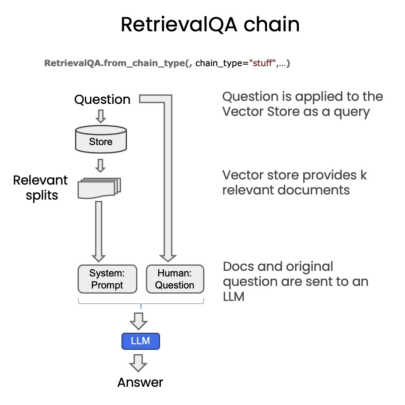

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/RetrievalQA_chain.png")
plt.figure(figsize=(6, 5))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

If there are a lot of ducuments that can't pass trough the same context windows:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


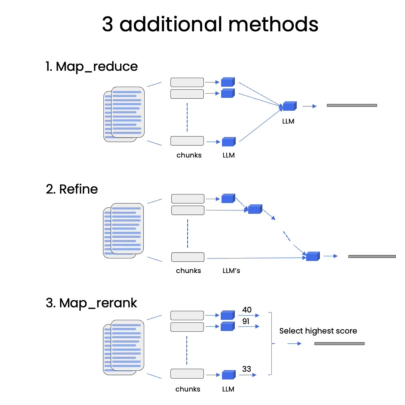

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/3methods.png")
plt.figure(figsize=(6, 5))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

### 6.2 - Setup env

In [ ]:
pip install chromadb tiktoken

In [ ]:
pip install -U langchain-community

In [ ]:
from getpass import getpass
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch
import os
from langchain.vectorstores import Chroma

In [ ]:
# Créer une instance des embeddings OpenAI
embeddings = OpenAIEmbeddings(
    model='text-embedding-ada-002',
    openai_api_key=API_key_OPENAI
)


In [ ]:
vectordb # defined in the section

In [ ]:
print(vectordb._collection.count())

0


In [ ]:
question = "Quelle est l'ambition de Groupama pour l'avenir ?"

In [ ]:
docs = vectordb.similarity_search(question, k=3 )
len(docs)

3

In [ ]:
docs

[Document(metadata={}, page_content='.\nGroupama, c’est aussi des filiales en France \net à l’international qui nous aident à être \nmeilleurs, à capter de la croissance, à diver-\nsifier les risques, à gagner en efficacité, à \nproposer des services innovants qui intè-\ngrent nos offres d’assurance'),
 Document(metadata={}, page_content='.\nGroupama, c’est aussi des filiales en France \net à l’international qui nous aident à être \nmeilleurs, à capter de la croissance, à diver-\nsifier les risques, à gagner en efficacité, à \nproposer des services innovants qui intè-\ngrent nos offres d’assurance'),
 Document(metadata={}, page_content='. Les initia-\ntives ont été nombreuses, les actions \nconcrètes aussi !\nPour réaliser notre ambition, « Bâtir le \nGroupe mutualiste champion de l’accom-\npagnement des clients », nous devons aller \nencore plus loin, ensemble')]

### 6.3 - RetrievalQA chain

In [ ]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-4o",
    openai_api_key= API_key_OPENAI
)

In [ ]:
from langchain.chains import RetrievalQA
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever()
)

In [ ]:
resultat = qa_chain({"query" :question})

In [ ]:
resultat

{'query': "Quelle est l'ambition de Groupama pour l'avenir ?",
 'result': 'L\'ambition de Groupama pour l\'avenir est de "bâtir le groupe mutualiste champion de l\'accompagnement des clients".'}

Mapreduce a de nombreuses limitations:
- Perte de contexte global lors de la réduction
- doublons et incohérences
- Difficulté à maintenir une cohérence narrative ou logique
- Fragmentation excessive des données


### 6.3 - With a Prompt

In [ ]:
from langchain.prompts import PromptTemplate

# Build prompt
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, /n
just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. /n
Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [ ]:
# Run chain
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [ ]:
question = "Quelle est l'ambition de Groupama pour l'avenir ?"

In [ ]:
result = qa_chain({"query": question})

In [ ]:
result["result"]

"L'ambition de Groupama pour l'avenir est de bâtir un groupe mutualiste champion de l'accompagnement des clients. Merci pour votre question !"

In [ ]:
result["source_documents"][0]

Document(metadata={}, page_content='.\nGroupama, c’est aussi des filiales en France \net à l’international qui nous aident à être \nmeilleurs, à capter de la croissance, à diver-\nsifier les risques, à gagner en efficacité, à \nproposer des services innovants qui intè-\ngrent nos offres d’assurance')

### 6.4 - RetrievalQA chain types

Before stuff method. If many doc will not fit in the context method use : Map reduce, refine or

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    chain_type="map_reduce"
)

In [ ]:
result = qa_chain_mr({"query": question})

In [ ]:
result["result"]

'L\'ambition de Groupama pour l\'avenir est de "bâtir le Groupe mutualiste champion de l’accompagnement des clients."'

Mapreduce can handles many documents, bu with cost of limitations :
- Perte de contexte global
- Difficulté à maintenir une cohérence narrative
- Fragmentation excessive des données
- si informations dans plusieurs doc pas sur de les avoir a la fin dans la fenetre de context

Go to https://www.langchain.com/langsmith the LangChain webUI

### 6.5 - RetrievalQA limitations


Testing Refine chain offers to combine informations sequentially. It s carrying more information than the map_reduce

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    chain_type="refine"
)

In [ ]:
result = qa_chain_mr({"query": question})

In [ ]:
result["result"]

"L'ambition de Groupama pour l'avenir est de bâtir le groupe mutualiste champion de l'accompagnement des clients. Pour réaliser cette ambition, Groupama vise à être meilleurs, à capter de la croissance, à diversifier les risques, à gagner en efficacité, et à proposer des services innovants qui intègrent leurs offres d’assurance, en s'appuyant sur leurs filiales en France et à l'international. Les initiatives ont été nombreuses et les actions concrètes aussi, mais pour atteindre cet objectif, il est essentiel que Groupama aille encore plus loin en multipliant les efforts et en travaillant ensemble."

Important : QA fails to preserve conversational history and dont have memory


## 7  - Chat (with history)

### 7.1 - memory

In [ ]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(
    memory_key ="chat_history",
    return_messages = True
)

<ipython-input-144-bfd9a5c69cc2>:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(


### 7.2 - ConversationalRetrievalChain

In [ ]:
from langchain.chains import ConversationalRetrievalChain
retriever=vectordb.as_retriever()
qa = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever,
    memory=memory
)

Here bellow we , do not just add a memory, but we add a step that take a history and a new question and combine it into an stand-alone question to pass into a vector store

In [ ]:
question = "c est quoi Groupama ?"
result = qa({"question": question})
result['answer']

"Groupama est une entreprise qui possède des filiales en France et à l'international. Ces filiales aident Groupama à améliorer ses performances, à capter de la croissance, à diversifier les risques, à gagner en efficacité, et à proposer des services innovants intégrés à ses offres d'assurance."

### 7.3 - Create a chatbot that works on your documents

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain.vectorstores import DocArrayInMemorySearch
from langchain.document_loaders import TextLoader
from langchain.chains import RetrievalQA,  ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import TextLoader
from langchain.document_loaders import PyPDFLoader

In [ ]:
def load_db(file, chain_type, k):
    # load documents
    loader = PyPDFLoader(file)
    documents = loader.load()
    # split documents
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150)
    docs = text_splitter.split_documents(documents)
    # define embedding
    embeddings = OpenAIEmbeddings(model='text-embedding-ada-002',openai_api_key=API_key_OPENAI)
    # create vector database from data
    db = DocArrayInMemorySearch.from_documents(docs, embeddings)
    # define retriever
    retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": k})
    # create a chatbot chain. Memory is managed externally for the convinience of the GUI bellow
    qa = ConversationalRetrievalChain.from_llm(
        llm=ChatOpenAI(model='gpt-4o',openai_api_key=API_key_OPENAI),
        chain_type=chain_type,
        retriever=retriever,
        return_source_documents=True,
        return_generated_question=True,
    )
    return qa


In [ ]:
!ls drive/MyDrive/Data/Groupama23.pdf

Groupama23.pdf	OutdoorClothingCatalog_1000.csv


In [ ]:
import panel as pn
pn.extension()

In [ ]:
import panel as pn
import param

class cbfs(param.Parameterized):
    chat_history = param.List([])
    answer = param.String("")
    db_query  = param.String("")
    db_response = param.List([])

    def __init__(self,  **params):
        super(cbfs, self).__init__( **params)
        self.panels = []
        self.loaded_file = "drive/MyDrive/Data/Groupama23.pdf"
        self.qa = load_db(self.loaded_file,"stuff", 4)

    def call_load_db(self, count):
        if count == 0 or file_input.value is None:  # init or no file specified :
            return pn.pane.Markdown(f"Loaded File: {self.loaded_file}")
        else:
            file_input.save("temp.pdf")  # local copy
            self.loaded_file = file_input.filename
            button_load.button_style="outline"
            self.qa = load_db("temp.pdf", "stuff", 4)
            button_load.button_style="solid"
        self.clr_history()
        return pn.pane.Markdown(f"Loaded File: {self.loaded_file}")

    def convchain(self, query):
        if not query:
            return pn.WidgetBox(pn.Row('User:', pn.pane.Markdown("", width=600)), scroll=True)
        result = self.qa({"question": query, "chat_history": self.chat_history})
        self.chat_history.extend([(query, result["answer"])])
        self.db_query = result["generated_question"]
        self.db_response = result["source_documents"]
        self.answer = result['answer']
        self.panels.extend([
            pn.Row('User:', pn.pane.Markdown(query, width=600)),
            pn.Row('ChatBot:', pn.pane.Markdown(self.answer, width=600, style={'background-color': '#F6F6F6'}))
        ])
        inp.value = ''  #clears loading indicator when cleared
        return pn.WidgetBox(*self.panels,scroll=True)

    @param.depends('db_query ', )
    def get_lquest(self):
        if not self.db_query :
            return pn.Column(
                pn.Row(pn.pane.Markdown(f"Last question to DB:", styles={'background-color': '#F6F6F6'})),
                pn.Row(pn.pane.Str("no DB accesses so far"))
            )
        return pn.Column(
            pn.Row(pn.pane.Markdown(f"DB query:", styles={'background-color': '#F6F6F6'})),
            pn.pane.Str(self.db_query )
        )

    @param.depends('db_response', )
    def get_sources(self):
        if not self.db_response:
            return
        rlist=[pn.Row(pn.pane.Markdown(f"Result of DB lookup:", styles={'background-color': '#F6F6F6'}))]
        for doc in self.db_response:
            rlist.append(pn.Row(pn.pane.Str(doc)))
        return pn.WidgetBox(*rlist, width=600, scroll=True)

    @param.depends('convchain', 'clr_history')
    def get_chats(self):
        if not self.chat_history:
            return pn.WidgetBox(pn.Row(pn.pane.Str("No History Yet")), width=600, scroll=True)
        rlist=[pn.Row(pn.pane.Markdown(f"Current Chat History variable", styles={'background-color': '#F6F6F6'}))]
        for exchange in self.chat_history:
            rlist.append(pn.Row(pn.pane.Str(exchange)))
        return pn.WidgetBox(*rlist, width=600, scroll=True)

    def clr_history(self,count=0):
        self.chat_history = []
        return


Create a Chatbot

In [ ]:
pip install jupyter_bokeh #facilite l'intégration de visualisations interactives Bokeh dans les notebooks Jupyter

In [ ]:
pn.pane.Markdown()

Markdown(None)

In [ ]:
cb = cbfs()

file_input = pn.widgets.FileInput(accept='.pdf')
button_load = pn.widgets.Button(name="Load DB", button_type='primary')
button_clearhistory = pn.widgets.Button(name="Clear History", button_type='warning')
button_clearhistory.on_click(cb.clr_history)
inp = pn.widgets.TextInput( placeholder='Enter text here…')

bound_button_load = pn.bind(cb.call_load_db, button_load.param.clicks)
conversation = pn.bind(cb.convchain, inp)

jpg_pane = pn.pane.Image( './img/convchain.jpg')

tab1 = pn.Column(
    pn.Row(inp),
    pn.layout.Divider(),
    pn.panel(conversation,  loading_indicator=True, height=300),
    pn.layout.Divider(),
)
tab2= pn.Column(
    pn.panel(cb.get_lquest),
    pn.layout.Divider(),
    pn.panel(cb.get_sources ),
)
tab3= pn.Column(
    pn.panel(cb.get_chats),
    pn.layout.Divider(),
)
tab4=pn.Column(
    pn.Row( file_input, button_load, bound_button_load),
    pn.Row( button_clearhistory, pn.pane.Markdown("Clears chat history. Can use to start a new topic" )),
    pn.layout.Divider(),
    pn.Row(jpg_pane.clone(width=400))
)
dashboard = pn.Column(
    pn.Row(pn.pane.Markdown('# ChatWithYourData_Bot')),
    pn.Tabs(('Conversation', tab1), ('Database', tab2), ('Chat History', tab3),('Configure', tab4))
)
dashboard

Column
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Row
                [0] TextInput(placeholder='Enter text here…')
            [1] Divider()
            [2] ParamFunction(function, _pane=WidgetBox, defer_load=False, height=300, loading_indicator=True)
            [3] Divider()
        [1] Column
            [0] ParamMethod(method, _pane=Column, defer_load=False)
            [1] Divider()
            [2] ParamMethod(method, _pane=Str, defer_load=False)
        [2] Column
            [0] ParamMethod(method, _pane=WidgetBox, defer_load=False)
            [1] Divider()
        [3] Column
            [0] Row
                [0] FileInput(accept='.pdf')
                [1] Button(button_type='primary', name='Load DB')
                [2] ParamFunction(function, _pane=Markdown, defer_load=False)
            [1] Row
                [0] Button(button_type='warning', name='Clear History')
                [1] Markdown(str)
            [2] Divider()
            [3] Row
                [0] Image(str, width=400)